In [ ]:
import numpy as np
import pandas as pd
from gym import Env
from gym.spaces import Box, Discrete

# Customized Gym Enviornment
- the scope of this notebook is to implement a customized Environment on which we can train a Reinforcement Learning Agent


- we inherit from the gym.Env as superclass
- in this formalism it is compulsary to have a reset() method that returns a value consistent with the observation_space() 
- and a step function that takes as an input a valid action_space() value and returns state, reward, done, {}

- the environment describes the situation of somebody in the shower that has to keep the temperature that is randomly changing within a certain temperature range by adjusting the temperature regulator

In [ ]:
class CustomEnv(Env):
    def __init__(self):
        self.action_space = Box( 
            low=np.array([-1]), high=np.array([1]), dtype=np.float16) #Discrete(3)
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        self.state = 38 + np.random.randint(-3,3)
        self.shower_length = 60
        
    def step(self, action):
        self.state += action -1 
        self.shower_length -= 1 
        
        if self.state >=37 and self.state <=39: 
            reward =1 
        else: 
            reward = -1 
        
        if self.shower_length <= 0: 
            done = True
        else:
            done = False
        
        info = {}
        
        # Return step information
        return self.state, reward, done, info
    
    def reset(self):
        self.state = 38 + random.randint(-3,3)
        self.shower_length = 60 
        return self.state

In [ ]:
env = CustomEnv()

In [ ]:
env.observation_space.sample()
env.action_space.sample()

In [ ]:
state = 39
action = env.action_space.sample()

In [ ]:
print(env.step(action[0]))

-  CustomEnv2 is a varinat that also takes in a data frame (df) of historic temperature values

In [2]:
class CustomEnv2(Env):
        """A stock trading environment for OpenAI gym"""
        metadata = {'render.modes': ['human']}
        def __init__(self, df):
            super( CustomEnv2, self).__init__()

            self.df = df['Temp']
            self.action_space = Box( 
                low=np.array([-1]), high=np.array([1]), dtype=np.float16) #Discrete(3)
            self.observation_space = Box(low=np.array([0]), high=np.array([100]))
            #self.state = 38 + np.random.randint(-3,3)  has to be defined
            self.shower_length = len(self.df)
            self.current_step = 0
            

        
        def step(self, action):
            self.state = self.df.loc[self.current_step]
            self.state += action
            self.shower_length -= 1 

            if self.state >=37 and self.state <=39: 
                reward =1 
            else: 
                reward = -1 

            if self.shower_length <= 0: 
                done = True
            else:
                done = False

            info = {}
            #
            self.current_step += 1

            # Return step information
            return self.state, reward, done, info
        
        def render(self, mode='human', close=False):
        # Render the environment to the screen
        
            return self.state, 
        
        def reset(self):
            self.current_step = 0
            self.shower_length = len(self.df)


In [10]:
x=np.array([38])
df = []
for i in range(1,29):
    x = np.append(x, 38 + np.random.randint(-3,3))
    
df = pd.DataFrame(data = {'Temp': x})


In [ ]:
print(df.loc[0])

In [4]:
env2 = CustomEnv2(df)

/Users/michiundslavki/opt/anaconda3/envs/FINRlearn/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(
/Users/michiundslavki/opt/anaconda3/envs/FINRlearn/lib/python3.10/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


- this is the action of a random agent throughout a whole epsiode

In [14]:
a=-1 
b=1
done=False
State = np.zeros([0])
while done is not True: 
    action = (b - a) * np.random.rand() + a
    
    state, reward, done, _ = env2.step(action)
    State = np.append(State, state)
    print(env2.render(), reward)

(37.37675091662275,) 1
(39.74498153376948,) -1
(35.04169866577228,) -1
(36.81501013393374,) -1
(40.71064627612988,) -1
(36.22161679985232,) -1
(40.44602534209463,) -1
(37.8838868612253,) 1
(36.045137068018654,) -1
(36.06972285112382,) -1
(34.0866622312357,) -1
(39.455676349647234,) -1
(36.209738005122944,) -1
(35.33483258450534,) -1
(40.224492230861436,) -1
(37.577284094597125,) 1
(39.21344140609785,) -1
(38.12764512660757,) 1
(40.01361454250628,) -1
(39.66309067133144,) -1
(35.694227589997375,) -1
(35.41401957161638,) -1
(39.72406907084325,) -1
(34.903401887748515,) -1
(36.32319548230697,) -1
(37.88832279175245,) 1
(38.18939950055618,) 1
(40.41465065336991,) -1
(40.22761284635279,) -1


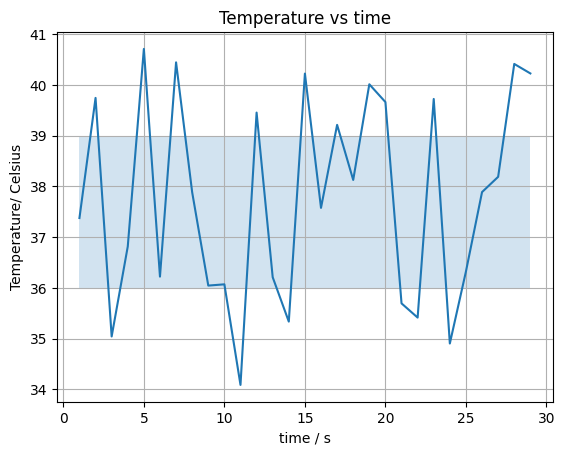

In [39]:

feature = t_step
label = State
label_low = np.full(29, 36)
label_high = np.full(29, 39)


fig, ax = plt.subplots()
ax.fill_between(feature, label_low, label_high, alpha=0.2)
ax.plot(feature, label)
ax.set_xlabel("time / s")
ax.set_ylabel('Temperature/ Celsius')
ax.set_title('Temperature vs time')
ax.grid()

- Can you train Reinforcment Learning Agent to perform better
- Make sure you choose an Alogorithm that can handle conintous action spaces